In [1]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Train and Test load

In [2]:
train_orig = pd.read_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_Sentiment_data/train_F3WbcTw.csv")

In [3]:
test_orig = pd.read_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_Sentiment_data/test_tOlRoBf.csv")

In [4]:
train_orig.shape

(5279, 4)

In [5]:
test_orig.shape

(2924, 3)

In [6]:
train_orig.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [7]:
test_orig.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [8]:
train_orig["text_drug"] = train_orig['text']+train_orig['drug']

In [9]:
test_orig["text_drug"] = test_orig['text']+test_orig['drug']

In [10]:
train_orig["text"] = train_orig["text_drug"]
test_orig["text"] = test_orig["text_drug"]

In [11]:
from Sentiment_prediction import Process_and_predict

In [12]:
train_orig.rename(columns = {'text':'Text'},inplace = True)

In [13]:
test_orig.rename(columns = {'text':'Text'},inplace = True)

In [23]:
test_orig = Process_and_predict(test_orig)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [16]:
sample_sub_orig = pd.read_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_Sentiment_data/sample_submission_i5xnIZD (1).csv")

In [17]:
sample_sub_orig.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,0
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,0
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,0
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,0


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,0
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,0
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,0
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,0


In [21]:
test_orig['comp_sentiment'] = test_orig['comp_sentiment'].replace({'Positive': 0, 'Negative': 1, 'Neutral': 2})

In [22]:
test_orig.head()

,index,unique_hash,Text,drug,comp_sentiment
0,0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,1
1,1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,0
2,2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,1
3,3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,2
4,4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,1


,index,unique_hash,Text,drug,comp_sentiment
0,0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,1
1,1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,0
2,2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,1
3,3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,2
4,4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,1


In [23]:
submission = test_orig[['unique_hash','comp_sentiment']]

In [24]:
submission.rename(columns = {'comp_sentiment':'sentiment'},inplace = True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [30]:
submission.shape

(2924, 2)

In [27]:
submission.to_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_output/Logi_senti.csv",index = False)

In [31]:
train_orig['sentiment'].value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

In [32]:
submission['sentiment'] = 2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [34]:
submission.to_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_output/mode_submission.csv",index = False)

In [26]:
#import keras
import nltk
import pandas as pd
import numpy as np
import re

def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

data_medicine = standardize_text(train_orig, "Text")

In [25]:
data_review = None

In [25]:
#Bag of Words

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = data_medicine["Text"].tolist()
list_labels = data_medicine["sentiment"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.01, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
#X_train = v.fit_transform(df['Review'].values.astype('U'))
X_test_counts = count_vectorizer.transform(X_test)

In [16]:
import matplotlib.pyplot as plt


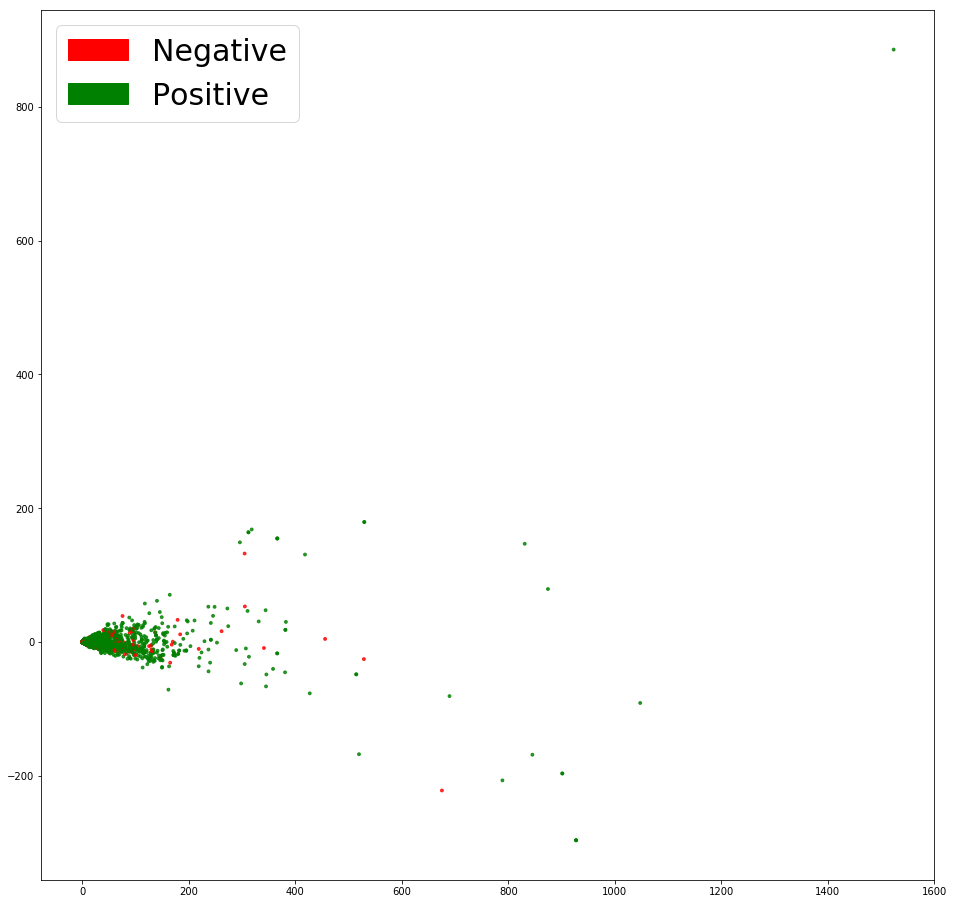

In [29]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
%matplotlib inline

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','green','green']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='red', label='Negative')
            green_patch = mpatches.Patch(color='green', label='Positive')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                          n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.660, precision = 0.667, recall = 0.660, f1 = 0.656


In [33]:
#import keras
import nltk
import pandas as pd
import numpy as np
import re

def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

data_medicine_test = standardize_text(test_orig, "Text")

In [34]:
list_corpus = data_medicine_test["Text"].tolist()

In [35]:
X_test_counts = count_vectorizer.transform(list_corpus)

In [36]:
test_predict = clf.predict(X_test_counts)

In [37]:
test_orig['sentiment'] = clf.predict(X_test_counts)

In [38]:
data_medicine_test.shape

(2924, 7)

In [61]:
y_predicted_counts

array([2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 2, 1])

In [39]:
test_orig['sentiment'] = test_predict

In [41]:
test_orig['sentiment'].value_counts()

2    2301
1     340
0     283
Name: sentiment, dtype: int64

In [42]:
submissiom = test_orig[['unique_hash','sentiment']]

In [43]:
submissiom.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [44]:
submissiom.to_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_output/Logi_senti_AV_Train_Drug.csv",index = False)

In [19]:
#import keras
import nltk
import pandas as pd
import numpy as np
import re

#TFIDF

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def tf(data):
    tfidf = TfidfVectorizer()

    emb = tfidf.fit_transform(data)

    return emb, tfidf
list_corpus = data_medicine["Text"].tolist()
list_labels = data_medicine["sentiment"].tolist()


X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.01, 
                                                                                random_state=40)

X_train_tfidf, tfidf = tf(X_train)
X_test_tfidf = tfidf.transform(X_test)

#val_counts = tfidf.transform(test_df.subject)

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.8, class_weight='balanced', solver='newton-cg', 
                          n_jobs=-1, random_state=40)
clf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf.predict(X_test_tfidf)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.679, precision = 0.717, recall = 0.679, f1 = 0.694


In [27]:
data_medicine_test = standardize_text(test_orig, "Text")

In [28]:
list_corpus_test = data_medicine_test["Text"].tolist()
#list_labels = data_medicine["sentiment"].tolist()

In [29]:
X_train_tfidf, tfidf = tf(list_corpus)
X_test_tfidf = tfidf.transform(list_corpus_test)


In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.8, class_weight='balanced', solver='newton-cg', 
                          n_jobs=-1, random_state=40)
clf.fit(X_train_tfidf, list_labels)

test_orig['sentiment'] = clf.predict(X_test_tfidf)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [68]:
submission_refined = test_orig[['unique_hash','sentiment']]

In [69]:
submission_refined.to_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_output/Logi_senti_AV_Train_tfidf.csv",index = False)

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=3,max_depth=10,min_samples_split=10)

bclf = AdaBoostClassifier(base_estimator=clf,n_estimators=clf.n_estimators)


bclf.fit(X_train_tfidf,list_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=3, random_state=None)

In [79]:
test_orig['sentiment'] = bclf.predict(X_test_tfidf)

In [80]:
submission_refined = test_orig[['unique_hash','sentiment']]

In [81]:
submission_refined.to_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_output/Logi_senti_AV_Train_tfidf_ramdom_boosting.csv",index = False)

In [50]:
dt_train = bclf.predict(X_train_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_train, dt_train)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000


In [2]:
import numpy as np

In [3]:
np.logspace(-3,3,20)

array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [50]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"],"tol":np.logspace(-3,3,7),
      "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],'multi_class':["auto"],'max_iter':[1000]}# l1 lasso l2 ridge

In [36]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [47]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_tfidf, list_labels)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:7

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:7

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:7

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 10.0}
accuracy : 0.7330933888994128


In [41]:
from sklearn.linear_model import LogisticRegression

log_cv = LogisticRegression(C=1.0,n_jobs=-1,multi_class ='auto', penalty= 'l2',solver='newton-cg', tol= 10.0, class_weight='balanced',random_state=40)
log_cv.fit(X_train_tfidf, list_labels)

test_orig['sentiment'] = log_cv.predict(X_test_tfidf)

In [40]:
test_orig['sentiment'].value_counts()

2    1834
1     619
0     471
Name: sentiment, dtype: int64

In [37]:
submission_grid = test_orig[['unique_hash','sentiment']]

In [38]:
submission_grid.to_csv("/home/ec2-user/SageMaker/NLP/Laxmi/Sentiment_Classification/AV_output/result_grid_search.csv",index = False)